In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [52]:
import os

In [53]:

sum = [0,0,0]
K = 3
clf = KMeans(n_clusters=K)
filelist = ['image 1.jpg','image 2.jpg','image 3.jpg','image 4.jpg','image 5.jpg','image 6.jpg','image 7.jpg','image 8.jpg','image 9.jpg','image 10.jpg']
for image_file in filelist:
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clf.fit(image)
    label = [0, 0, 0]
    for x in clf.labels_:
        label[x] += 1
    label_sum = image.shape[0]
    label = [float(x) / label_sum for x in label]
    sum = np.add(sum,label)
sum = sum/10
    







<Container object of 3 artists>

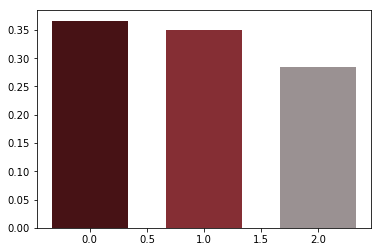

In [55]:
import webcolors
centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]

clr = [webcolors.rgb_to_hex(c) for c in centroids]
N = len(sum)
x= range(N)
width = 1/1.5
plt.bar(x, sum, width, color=clr)